# Problem Set 3

This problem set will focus on a dataset of book reviews. We will train models to classify these reviews and explore some of the trade-offs involved in this type of analysis. Subsequently, we will delve into word embeddings.

In this problem set, we will use book reviews, the same data we have utilized in Classes 6 and 8.

#### Question 1:
1. Import the data. Use the file you find here: https://drive.google.com/file/d/1vDMD1PifS2TY42EZn9Sr1onJEs6sJNhe/view?usp=drive_link
2. Filter the dataframe to include only reviews with scores of 1 or 5.
3. To expedite computation time, you may select a subsample of the data. Initially, you could use just 2000 reviews to ensure the code runs smoothly, then increase the number once you verify the efficiency of your code. Just know that the solutions to this problem set that I will upload will refer to the full dataset.
4. Create tokens using the text of the reviews.
5. Vectorize - choose the method you prefer.
6. Split the dataset into train and test.
7. Do the same for the review summaries.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import spacy
import pandas as pd

df = pd.read_pickle('/content/gdrive/MyDrive/book_reviews_with_vectors.pkl')
df.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,review_positive_help,review_tot_help,good_review,tokens,tokens_summary,review_vector,summary_vector,sentences
0,0802841899,The Church of Christ: A Biblical Ecclesiology ...,25.97,ARI272XF8TOL4,Christopher J. Bray,74/81,5.0,955411200,Ecclesiological Milestone,With the publication of Everett Ferguson's boo...,74,81,1,"[public, everett, ferguson, book, ecclesiolog,...","[ecclesiolog, mileston]","[-2.0775754, 0.27084994, -0.88893884, 0.107507...","[0.009980001, 1.073055, 0.63116, -1.2909601, 3...",[With the publication of Everett Ferguson's bo...
2,0809080699,The Repeal of Reticence: A History of America'...,NaN,A18YY5TBNSDW3O,Bartleby,29/29,5.0,899164800,Great treatment of the defeat of reticence by ...,"Using a quiet, restrained writing style that i...",29,29,1,"[quiet, restrain, write, style, pure, pleasur,...","[great, treatment, defeat, retic, exposur]","[-2.4936726, -0.25804076, -1.6005323, 0.185795...","[-5.707939, -3.5087557, -0.7184955, 1.9191003,...","[Using a quiet, restrained writing style that ..."
3,B000NKGYMK,Alaska Sourdough,NaN,NaN,NaN,36/37,5.0,949104000,Real Alaskan Sourdough,Ruth Allman has written an excellent book abou...,36,37,1,"[ruth, allman, written, excel, book, alaskan, ...","[real, alaskan, sourdough]","[-1.7104234, -0.21377458, -1.5417154, -0.17693...","[0.6521266, -1.0830933, 0.98326665, 2.0277, 2....",[Ruth Allman has written an excellent book abo...
4,B000NKGYMK,Alaska Sourdough,NaN,AC58Z72OB2DDX,Gary W. Marian,29/30,5.0,945734400,True Alaskan cooking,"I have been using this book since 1988, the ei...",29,30,1,"[book, eighth, print, honestli, best, sourdoug...","[true, alaskan, cook]","[-0.87671065, 0.22516514, -1.4362949, -1.41744...","[-0.11064005, -0.3506267, -1.3865666, 0.995293...","[I have been using this book since 1988, the e..."
5,B000NKGYMK,Alaska Sourdough,NaN,A3CNQIKVTG9QYO,MERRIBETH NORD,25/28,5.0,982972800,Cheechako to Sourdough in 190 Pages,"My poor dogeared, stained copy of this book ca...",25,28,1,"[poor, dogear, stain, copi, book, came, wai, d...","[cheechako, sourdough, page]","[-1.9095206, 0.45106357, -2.6475432, -1.010673...","[-1.4763833, 1.3613099, -2.1544366, 0.08993324...","[My poor dogeared, stained copy of this book c..."


In [ ]:
dir(df)

['Id',
 'Price',
 'T',
 'Title',
 'User_id',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_pri

In [4]:
# Filter the DataFrame to include only reviews with scores of 1 or 5
df = df[df['review/score'].isin([1, 5])]
df.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,review_positive_help,review_tot_help,good_review,tokens,tokens_summary,review_vector,summary_vector,sentences
0,0802841899,The Church of Christ: A Biblical Ecclesiology ...,25.97,ARI272XF8TOL4,Christopher J. Bray,74/81,5.0,955411200,Ecclesiological Milestone,With the publication of Everett Ferguson's boo...,74,81,1,"[public, everett, ferguson, book, ecclesiolog,...","[ecclesiolog, mileston]","[-2.0775754, 0.27084994, -0.88893884, 0.107507...","[0.009980001, 1.073055, 0.63116, -1.2909601, 3...",[With the publication of Everett Ferguson's bo...
2,0809080699,The Repeal of Reticence: A History of America'...,NaN,A18YY5TBNSDW3O,Bartleby,29/29,5.0,899164800,Great treatment of the defeat of reticence by ...,"Using a quiet, restrained writing style that i...",29,29,1,"[quiet, restrain, write, style, pure, pleasur,...","[great, treatment, defeat, retic, exposur]","[-2.4936726, -0.25804076, -1.6005323, 0.185795...","[-5.707939, -3.5087557, -0.7184955, 1.9191003,...","[Using a quiet, restrained writing style that ..."
3,B000NKGYMK,Alaska Sourdough,NaN,NaN,NaN,36/37,5.0,949104000,Real Alaskan Sourdough,Ruth Allman has written an excellent book abou...,36,37,1,"[ruth, allman, written, excel, book, alaskan, ...","[real, alaskan, sourdough]","[-1.7104234, -0.21377458, -1.5417154, -0.17693...","[0.6521266, -1.0830933, 0.98326665, 2.0277, 2....",[Ruth Allman has written an excellent book abo...
4,B000NKGYMK,Alaska Sourdough,NaN,AC58Z72OB2DDX,Gary W. Marian,29/30,5.0,945734400,True Alaskan cooking,"I have been using this book since 1988, the ei...",29,30,1,"[book, eighth, print, honestli, best, sourdoug...","[true, alaskan, cook]","[-0.87671065, 0.22516514, -1.4362949, -1.41744...","[-0.11064005, -0.3506267, -1.3865666, 0.995293...","[I have been using this book since 1988, the e..."
5,B000NKGYMK,Alaska Sourdough,NaN,A3CNQIKVTG9QYO,MERRIBETH NORD,25/28,5.0,982972800,Cheechako to Sourdough in 190 Pages,"My poor dogeared, stained copy of this book ca...",25,28,1,"[poor, dogear, stain, copi, book, came, wai, d...","[cheechako, sourdough, page]","[-1.9095206, 0.45106357, -2.6475432, -1.010673...","[-1.4763833, 1.3613099, -2.1544366, 0.08993324...","[My poor dogeared, stained copy of this book c..."


In [5]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
stoplist = stopwords.words('english')
stemmer = nltk.stem.porter.PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
df= df.head(2000)

In [7]:
def preprocess_text(df, text_column):
    # Tokenize
    df['tokens'] = df[text_column].apply(nltk.word_tokenize)

    # Remove punctuation, lowercase, remove empty strings, filter stopwords, and stem
    df['tokens_simple'] = df['tokens'].apply(lambda x: [re.sub(r'[^\w\s]', '', token).lower() for token in x])
    df['tokens_simple'] = df['tokens_simple'].apply(lambda x: [token for token in x if token and not token in stoplist])
    df['tokens_simple'] = df['tokens_simple'].apply(lambda x: [stemmer.stem(token) for token in x])

    # Drop the intermediate 'tokens' column if not needed
    df.drop(columns=['tokens'], inplace=True)

    return df

In [8]:
#now process text of review as X
df_processed = preprocess_text(df, 'review/text')

In [ ]:
df['tokens_simple'].head()

,tokens_simple
0,"[public, everett, ferguson, book, ecclesiolog,..."
2,"[use, quiet, restrain, write, style, pure, ple..."
3,"[ruth, allman, written, excel, book, alaskan, ..."
4,"[use, book, sinc, 1988, eighth, print, honestl..."
5,"[poor, dogear, stain, copi, book, came, way, d..."


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=None,
                             lowercase=False,
                             min_df=0.005,
                             max_df=0.95
                             )

X = vectorizer.fit_transform(df['tokens_simple'].apply(lambda tokens: " ".join(tokens)))

In [ ]:
X.shape

(2000, 2708)

In [10]:
#now process summary of review as X1
df_processed1 = preprocess_text(df, 'review/summary')

In [11]:
vectorizer1 = CountVectorizer(tokenizer=None,
                             lowercase=False,
                             min_df=0.005,
                             max_df=0.95
                             )

X1 = vectorizer.fit_transform(df['tokens_simple'].apply(lambda tokens: " ".join(tokens)))

In [ ]:
X1.shape

(2000, 104)

#### Question 2:
1. The Random Forest Model is one classifier that we have not covered in class. Refer to this link for the Scikit-Learn implementation: [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).
2. Train a Random Forest to predict whether the review is good (5 stars) or bad (1 star).
3. Train a binary classifier, similar to the one we saw in class, using the same data.
4. Consider accuracy and other metrics that you find useful. Also, plot the confusion matrix. What can you say about how the two models are performing? Note that performance will depend on sample size, and the two models may be affected differently by changes in sample size. Ensure that when you comment on the results, you do so based on the sample size that corresponds to your final choice.
5. Perform the same analysis for the review summaries, focusing solely on accuracy for simplicity. Is accuracy higher or lower in this case? Why do you think this is the case?


In [13]:
#2
from sklearn.ensemble import RandomForestClassifier

In [14]:
#conduct analysis on review text
Y= df['review/score']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['review/score'], test_size=0.2, random_state=42)

In [15]:
# Initialize the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Calculate accuracy directly
accuracy = rf_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7925


In [17]:
from sklearn.metrics import precision_score, recall_score
Y_pred = rf_classifier.predict(X_test)
print('Precision:',precision_score(y_test, Y_pred))
print('Recall:',recall_score(y_test, Y_pred))

Precision: 0.8613861386138614
Recall: 0.5576923076923077


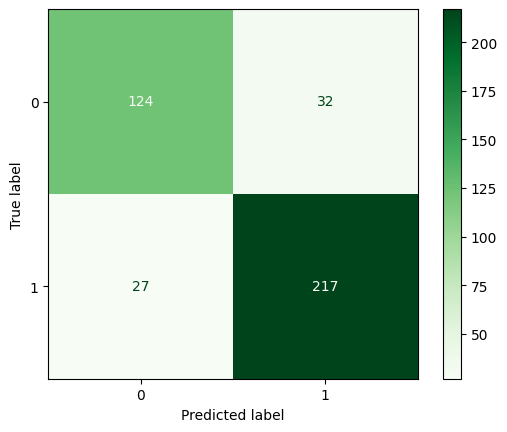

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, Y_pred)
display = ConfusionMatrixDisplay(cm)
display.plot(cmap='Greens')

In [18]:
#3 Binary classifier(Logistic regression) by mapping the review score to binary labels
df['good_review'] = (df['review/score'] == 5).astype(int)
df['good_review'].head()

,good_review
0,1
2,1
3,1
4,1
5,1


In [19]:
df['good_review'].value_counts()

,count
good_review,
1,1234
0,766


In [20]:
Y = df['good_review']

X_train, X_test, y_train, y_test = train_test_split(X, df['good_review'], test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Evaluate the classifier with Accuracy
accuracy = log_reg.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8525


In [22]:
Y_pred = log_reg.predict(X_test)
print('Precision:',precision_score(y_test, Y_pred))
print('Recall:',recall_score(y_test, Y_pred))

Precision: 0.8714859437751004
Recall: 0.889344262295082


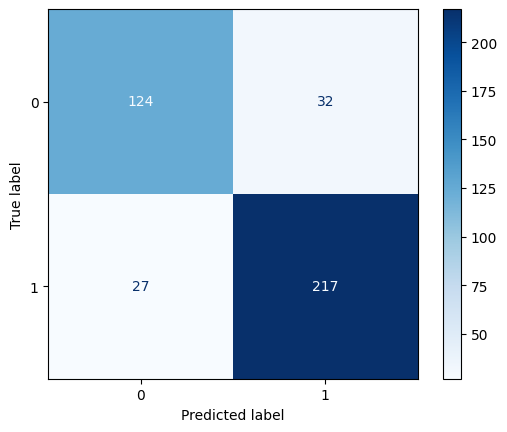

In [25]:
cm = confusion_matrix(y_test, Y_pred)
display = ConfusionMatrixDisplay(cm)
display.plot(cmap='Blues')

4. Comments: With both of the models having a sample size of 2000(1600+400), generally the binary classifier model is performing better than the random forest model, with higher accuracy and recall. However, the precision of the random forest model is higher, which indicates that it is better at predicting positives than random forest model. We can see from the confusion matrix that binary makes much higher proportion of false positive predictions than the binary one.

In [27]:
#5. conduct analysis on summary of review
y= df['review/score']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, df['review/score'], test_size=0.2, random_state=42)

In [28]:
# Initialize the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
accuracy = rf_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.665


In [29]:
# The binary classifier/logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
accuracy = log_reg.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.685


5. In this case, accuracy is lower for both of the models in this case. Because the text contained in summary is much less than the review, and the training data the model can get is much less, which leads to lower accuracy in the test data set.

## Using Embeddings

### Question 3:
1. What code would you use to do the following?
- Using SpaCy, load the medium model and obtain vector representations for the reviews. Perform the same process for the review summary (column "review/summary"). Store these vector representations in two new columns, which you can name "review_vector" and "summary_vector".

**You do not need to run the code. Note that review_vector and summary_vector are already present in the file you loaded, this is because doing this operation would require more than 90 minutes.**
2. Create a new split of the data, now using "review_vector" as X. Retrain the two models you have previously trained, and monitor their performance.
3. Repeat the process using "summary_vector".
4. Discuss the results. Static embeddings, like those used here, are typically recommended for shorter texts. In our dataset, several reviews are quite lengthy, while summaries tend to be only a few words long. Based on your analysis, would you say that embeddings are particularly useful for dealing with short text? Provide reasons for your answer.

In [ ]:
#1
!python -m spacy download en_core_web_md
! pip install floret
nlp = spacy.load('en_core_web_md')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 19.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 4.5 MB/s eta 0:00:00


In [ ]:
def get_vector(text):
    doc = nlp(text)
    return doc.vector

df['review_vector'] = df['review/text'].apply(get_vector)
df['summary_vector'] = df['review/summary'].apply(get_vector)

In [ ]:
df[['review/text', 'review_vector', 'review/summary', 'summary_vector']].head()

,review/text,review_vector,review/summary,summary_vector
0,With the publication of Everett Ferguson's boo...,"[-2.0775754, 0.27084994, -0.88893884, 0.107507...",Ecclesiological Milestone,"[0.009980001, 1.073055, 0.63116, -1.2909601, 3..."
2,"Using a quiet, restrained writing style that i...","[-2.4936726, -0.25804076, -1.6005323, 0.185795...",Great treatment of the defeat of reticence by ...,"[-5.707939, -3.5087557, -0.7184955, 1.9191003,..."
3,Ruth Allman has written an excellent book abou...,"[-1.7104234, -0.21377458, -1.5417154, -0.17693...",Real Alaskan Sourdough,"[0.6521266, -1.0830933, 0.98326665, 2.0277, 2...."
4,"I have been using this book since 1988, the ei...","[-0.87671065, 0.22516514, -1.4362949, -1.41744...",True Alaskan cooking,"[-0.11064005, -0.3506267, -1.3865666, 0.995293..."
5,"My poor dogeared, stained copy of this book ca...","[-1.9095206, 0.45106357, -2.6475432, -1.010673...",Cheechako to Sourdough in 190 Pages,"[-1.4763833, 1.3613099, -2.1544366, 0.08993324..."


In [ ]:
#2
X = list(df['review_vector'])

# Now train the random forest model
y = df['review/score']
X_train, X_test, y_train, y_test = train_test_split(X, df['review/score'], test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
accuracy = rf_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)
Y_pred = rf_classifier.predict(X_test)
print('Precision:',precision_score(y_test, Y_pred))
print('Recall:',recall_score(y_test, Y_pred))

Accuracy: 0.785
Precision: 0.7692307692307693
Recall: 0.6410256410256411


In [ ]:
# Now train the binary model
Y = df['good_review']
X_train, X_test, y_train, y_test = train_test_split(X, df['good_review'], test_size=0.2, random_state=42)
sgd_clf = SGDClassifier(max_iter=1000)
sgd_clf.fit(X_train, y_train)
accuracy = sgd_clf.score(X_test, y_test)
print("Accuracy:", accuracy)
Y_pred = sgd_clf.predict(X_test)
print('Precision:',precision_score(y_test, Y_pred))
print('Recall:',recall_score(y_test, Y_pred))

Accuracy: 0.8275
Precision: 0.8723404255319149
Recall: 0.8401639344262295


In [ ]:
#3
X = list(df['summary_vector'])

# Now train the random forest model
y = df['review/score']
X_train, X_test, y_train, y_test = train_test_split(X, df['review/score'], test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
accuracy = rf_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)
Y_pred = rf_classifier.predict(X_test)
print('Precision:',precision_score(y_test, Y_pred))
print('Recall:',recall_score(y_test, Y_pred))

Accuracy: 0.715
Precision: 0.6779661016949152
Recall: 0.5128205128205128


In [ ]:
# Now train the binary model
Y = df['good_review']
X_train, X_test, y_train, y_test = train_test_split(X, df['good_review'], test_size=0.2, random_state=42)
sgd_clf = SGDClassifier(max_iter=1000)
sgd_clf.fit(X_train, y_train)
accuracy = sgd_clf.score(X_test, y_test)
print("Accuracy:", accuracy)
Y_pred = sgd_clf.predict(X_test)
print('Precision:',precision_score(y_test, Y_pred))
print('Recall:',recall_score(y_test, Y_pred))

Accuracy: 0.6725
Precision: 0.7868020304568528
Recall: 0.6352459016393442


4. After applying embedding, the performance matrices like accuracy, precision and recall for reviews, which are longer texts, decreases; while those for summary analysis increases. This shows that static embeddings are more useful for models to classify shorter text.

### Question 4:
The models mentioned above depend on a set of hyperparameters that regulate the model's structure, how the loss function is calculated, and other aspects that affect performance.
1. Can you provide a few examples of such parameters? To do this, review the documentation for the models you are using (start by searching for "Scikit-Learn" + the name of the model you are using).
2. How would you proceed to choose the combination of parameters that offers the best performance in your setting? You do not need to implement code to answer this question, just outline the criteria you would use and explain why.

1. For the Random Forest model, the parameters include: n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features, etc. For the SGDClassifier model, the parameters include: loss, penalty, alpha, l1_ratio, fit_intercept, max_iter, etc.

2. I will first learn our objectives of training the model, and have a good understanding of our data. Next, we should define and prioritize performance metrics, such as accuracy or precision. Then we can search online from scikit-learn and see if there are some default settings of the parameters or convention of people applying it. A cross-validation to test the model and the hyperparameters is also necessary to see if the parameters are working well. We can always go back and tune the parameters after training and testing the model.


## Estimating Embeddings

### Question 5:
1. Prepare the data and train a Word2Vec model using the text from the reviews.
2. Find the terms whose embeddings are similar to the word "plot" according to the model you have trained. Do the same for another term of your choice (consider using terms that could potentially characterize the language used in book reviews).
3. Do the same as in point 2, this time using the pre-trained word2vec model we used in Class 7.
4. What differences do you observe? What could these differences be attributed to?

In [ ]:
from gensim.models import Word2Vec

In [ ]:
# 1
# Prepare the data
reviews_token_list = df['tokens_simple'].tolist()

# Train the Word2Vec model
model = Word2Vec(sentences=reviews_token_list, vector_size=100, window=5, min_count=1, sg=0)

# Save the model
model.save("word2vec_reviews.model")

In [ ]:
# 2
model_path='word2vec_reviews.model'
word_vectors = KeyedVectors.load(model_path)
word_vectors.wv.most_similar('plot')

[('hardi', 0.9996968507766724),
 ('materi', 0.9996610879898071),
 ('practic', 0.9996235966682434),
 ('food', 0.9996192455291748),
 ('skill', 0.999609112739563),
 ('except', 0.9995800256729126),
 ('basic', 0.9995763301849365),
 ('close', 0.9995588660240173),
 ('grow', 0.9995587468147278),
 ('research', 0.9995488524436951)]

In [ ]:
word_vectors.wv.most_similar('character')

[('group', 0.9992415904998779),
 ('england', 0.9991909265518188),
 ('realiti', 0.9991900324821472),
 ('role', 0.9991831183433533),
 ('black', 0.9991745948791504),
 ('univers', 0.9991709589958191),
 ('myth', 0.999165952205658),
 ('theori', 0.9991592764854431),
 ('commun', 0.9991434812545776),
 ('form', 0.999133288860321)]

**Note that the code may crash at this stage for the lack of memory on Colab. You can run the next code after reconnecting.**

In [ ]:
from gensim.models import KeyedVectors
pre_model_path = '/content/gdrive/MyDrive/GoogleNews-vectors-negative300.bin.gz'
pre_word_vectors = KeyedVectors.load_word2vec_format(pre_model_path, binary=True)

In [ ]:
pre_word_vectors.most_similar('plot')

[('plots', 0.7624845504760742),
 ('Plot', 0.6524182558059692),
 ('plotting', 0.6327632069587708),
 ('plotted', 0.5957664251327515),
 ('plotline', 0.5926421284675598),
 ('Guy_Fawkes_gunpowder', 0.5758047103881836),
 ('uncovered_Peul', 0.5485947132110596),
 ('plotters', 0.5415518879890442),
 ('Victorian_Londoner_interred', 0.5274915099143982),
 ('storyline', 0.526805579662323)]

In [ ]:
pre_word_vectors.most_similar('character')

[('characters', 0.7418640851974487),
 ('protagonist', 0.6623691320419312),
 ('Adversity_builds', 0.6250343918800354),
 ('titular_character', 0.6126604676246643),
 ('charater', 0.6074473857879639),
 ('onscreen_persona', 0.598468542098999),
 ('villain', 0.5970299243927002),
 ('charcter', 0.5878469347953796),
 ('storyline', 0.5787386894226074),
 ('plotline', 0.5761162638664246)]

The words are very different from each other when the model is trained by review text and Google news, and Google news also contains other forms of the word, which means it hadn't stemmized them. The similarity from the Google new is also much lower than that from review text. I think it is because the Google news dataset is much larger, and the context is different where in news, people talk about many other things besides book reviews, therefore the range that the most similar words cover will be wider, and the results will be less intuitive.

### Note
As discussed in class, static embeddings, like those used in this problem set, have been utilized to capture semantic properties of words and compare the meanings of terms across different groups or time periods. We explored the idea of examining the set of most similar words and comparing sets of neighbors.

For those interested in this type of analysis, the papers by Hamilton et al. (2016)a and (2016)b offer methodologies to formalize the intuition based on neighbors and cosine distance between vectors. These two papers are provided here for further reading:

- "Diachronic Word Embeddings Reveal Statistical Laws of Semantic Change" by William L. Hamilton, Jure Leskovec, Dan Jurafsky: [https://arxiv.org/pdf/1605.09096.pdf](https://arxiv.org/pdf/1605.09096.pdf)

- "Cultural Shift or Linguistic Drift? Comparing Two Computational Measures of Semantic Change" by William L. Hamilton, Jure Leskovec, Dan Jurafsky: [https://aclanthology.org/D16-1229.pdf](https://aclanthology.org/D16-1229.pdf)

For a practical guide on implementing the measures suggested in these papers using Python, I recommend the Colab Notebook by Sandeep Soni and Connor Gilroy on "Comparing Word Embeddings Models": [https://colab.research.google.com/drive/16cM5NXedlrvU2mp-HcYKs9OIMkYItTS1?usp=sharing](https://colab.research.google.com/drive/16cM5NXedlrvU2mp-HcYKs9OIMkYItTS1?usp=sharing#scrollTo=RbIw-eWTkpVQ).




